## 1. Line regression
### 1.1 Ordinary Least Squares (OLS) Perspective

#### 1.1.1 Model Representation:
The linear regression model is represented as:
$$
\hat{Y} = X\theta
$$
where:
- $ X $ is the design matrix with dimensions $ n \times (m+1) $ (including the intercept term).
- $ \theta$ is the parameter vector with dimensions $ (m+1) \times 1 $.

#### 1.1.2 Loss Function:
The mean squared error (MSE) is given by:
- No regularization
$$
J(\theta) = \frac{1}{n}(X\theta - Y)^T(X\theta - Y)
$$
- L1 regularization
$$
J(\theta) = \frac{1}{n}(X\theta - Y)^T(X\theta - Y) + \lambda \|\mathbf{\theta}\|_1
$$
- L2 regularization
$$
J(\theta) = \frac{1}{n}(X\theta - Y)^T(X\theta - Y) + \lambda\theta^T\theta
$$

#### 1.1.3 Objective:
Given a dataset with $n$ samples and $m$ features, we want to find the parameter vector $\theta$ that minimizes the mean squared error (MSE) between predicted values $\hat{Y}$ and actual values $y$.
$$
\theta = \arg\min_\theta{J(\theta)}
$$

#### 1.1.4 Solution:
1. **Gradient of $\theta$:**
    - No regularization
$$
\frac{\partial J}{\partial \theta} = \frac{2}{n}X^T(X\theta - y)
$$
    - L1 regularization
$$
\frac{\partial J}{\partial \theta} = \frac{2}{n}X^T(X\theta - y)+\lambda \text{sign}(\mathbf{\theta})
$$
    - L2 regularization
$$
\frac{\partial J}{\partial \theta} = \frac{2}{n}X^T(X\theta - y)+2\lambda\theta
$$
2. **Closed-Form for $\theta$:**
    - No regularization
$$
\begin{equation}
\begin{split}
& \frac{2}{n}X^T(X\theta - y) = 0 \\
& X^TX\theta - X^Ty = 0 \\
& \theta = (X^TX)^{-1}X^Ty
\end{split}
\end{equation}
$$
    - L1 regularization
    
    The closed-form solution for OLS with L1 penalty doesn't have a direct analytical solution due to the non-differentiability of the L1 norm. However, it can be solved using optimization algorithms like coordinate descent or proximal gradient descent. These algorithms iteratively update the coefficients until convergence.
    
    - L2 regularization
$$
\begin{equation}
\begin{split}
& \frac{2}{n}X^T(X\theta - y)+2\lambda\theta = 0 \\
& (X^TX+\lambda n I)\theta = X^Ty \\
& \theta = (X^T X + \lambda n I)^{-1} X^Ty
\end{split}
\end{equation}
$$

### 1.2 Maximum Likelihood Estimation Perspective

#### 1.2.1 Model Representation:
The linear regression model is represented as:
$$
y^{(i)} = x^{(i)T}\theta + \epsilon
$$
where:
- $x^{(i)}$ is the $i$th example which is a vector with dimensions $ (m+1) \times 1 $. (including the intercept term).
- $\theta$ is the parameter vector with dimensions $ (m+1) \times 1 $.
- $\epsilon $ is the error term assumed to be normally distributed with mean zero and variance $ \sigma^2 $, that is  $\epsilon\sim{N(0,\sigma^2)}$.
- $y^{(i)}|x^{(i)},\theta\sim{N(x^{(i)T}\theta,\sigma^2)}$.

#### 1.2.2 Likelihood and posterior Function:
Under the assumption of Gaussian errors, the likelihood function of the observed data is given by the product of the probability density functions of the individual observations:
- No regularization
$$
\begin{equation}
\begin{split}
P(X,Y|\theta) &= P(Y|X,\theta)*P(X|\theta) \\
&\propto P(Y|X,\theta) \\
& = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y^{(i)} - x^{(i)}\theta)^2}{2\sigma^2}\right) \\
& = \frac{1}{\sqrt{2\pi\sigma^2}} \exp{\left(-\frac{\sum_{i=1}^{n} (y^{(i)} - x^{(i)}\theta)^2}{2\sigma^2}\right)} \\
& = \frac{1}{\sqrt{2\pi\sigma^2}} \exp{\left(-\frac{(X\theta - Y)^T(X\theta - Y)}{2\sigma^2}\right)}
\end{split}
\end{equation}
$$
- L1 regularization

We assume $\theta\sim{Laplace(0,b)}$, so the priori probability of $\theta$ is
$$
P(\theta) = \frac{1}{2b}\exp{(-\frac{\left|\theta\right|}{b})}
$$
The posterior probability of $\theta$ is
$$
\begin{equation}
\begin{split}
P(\theta|X,Y) &= \frac{P(X,Y,\theta)}{P(X,Y)} \\
& \propto P(X,Y,\theta) \\
& = P(Y|X,\theta)*P(X|\theta)*P(\theta) \\
& \propto P(Y|X,\theta)*P(\theta) \\
& = \frac{1}{\sqrt{2\pi\sigma^2}} \exp{\left(-\frac{(X\theta - Y)^T(X\theta - Y)}{2\sigma^2}\right)} * \frac{1}{2b}\exp{(-\frac{\left|\theta\right|}{b})} \\
& = \frac{1}{2b\sqrt{2\pi\sigma^2}} \exp{\left(-\frac{(X\theta - Y)^T(X\theta - Y)+\frac{2\sigma^2}{b}\left|\theta\right|}{2\sigma^2}\right)}\\
\end{split}
\end{equation}
$$
- L2 regularization

We assume $\theta\sim{N(0,\Sigma)}$, so the priori probability of $\theta$ is
$$
P(\theta) = \frac{1}{(\sqrt{2\pi})^m\left|\Sigma\right|^\frac{1}{2}}\exp{(-\frac{\theta^T\Sigma^{-1}\theta}{2})}
$$
The posterior probability of $\theta$ is
$$
\begin{equation}
\begin{split}
P(\theta|X,Y) & \propto P(Y|X,\theta)*P(\theta) \\
& = \frac{1}{\sqrt{2\pi\sigma^2}} \exp{\left(-\frac{(X\theta - Y)^T(X\theta - Y)}{2\sigma^2}\right)} * \frac{1}{(\sqrt{2\pi})^m\left|\Sigma\right|^\frac{1}{2}}\exp{(-\frac{\theta^T\Sigma^{-1}\theta}{2})} \\
&\propto \exp{\left(-\frac{(X\theta - Y)^T(X\theta - Y)+\sigma^2\theta^T\Sigma^{-1}\theta}{2\sigma^2}\right)}\\
\end{split}
\end{equation}
$$
#### 1.2.3 Objective:
We seek to find the parameter vector $\theta$ that maximizes the likelihood or posterior function of the observed data
- No regularization
$$
\theta = \arg\max_\theta{P(X,Y|\theta)}=\arg\min_\theta{(X\theta - Y)^T(X\theta - Y)}= \arg\min_\theta{J(\theta)}
$$
- L1 regularization
$$
\theta = \arg\max_\theta{P(\theta|X,Y)}=\arg\min_\theta{(X\theta - Y)^T(X\theta - Y)}+\frac{2\sigma^2}{b}\left|\theta\right|=\arg\min_\theta{(X\theta - Y)^T(X\theta - Y)}+\lambda\left|\theta\right|= \arg\min_\theta{J(\theta)}
$$
- L2 regularization
$$
\theta = \arg\max_\theta{P(\theta|X,Y)}=\arg\min_\theta{(X\theta - Y)^T(X\theta - Y)}+\sigma^2\theta^T\Sigma^{-1}\theta=\arg\min_\theta{(X\theta - Y)^T(X\theta - Y)}+\lambda\theta^T\theta= \arg\min_\theta{J(\theta)}
$$
Although the object function is different, the form is the same with OLS.

### 1.3. Column space Perspective
![](https://pic1.zhimg.com/80/v2-437c1820680c560b2a7096977ce2e3a1_1440w.webp?source=1def8aca)
If we take $X\theta$ as a vector from the column space of $X$, then $X\theta - Y$ is the residual vector, and $(X\theta - Y)^T(X\theta - Y)$ is the square of residual vector magnitude. So Minimizing MSE is equivalent to find the shortest residual vector which is orthogonal to the column space, that is:

$$
\begin{equation}
\begin{split}
& X^T(X\theta - Y) = 0 \\
& X^TX\theta =X^TY \\
& \theta = (X^TX)^{-1}X^TY
\end{split}
\end{equation}
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

class LinearRegression:
    def __init__(self, lr=0.01, epochs=1000, method='closed_form', reg=None, alpha=0.01):
        self.lr = lr  # Learning rate
        self.epochs = epochs  # Number of iterations
        self.method = method  # Method: 'closed_form' for closed-form solution, 'gradient_descent' for gradient descent
        self.theta = None  # Parameters
        self.reg = reg  # Regularization method: None (no penalty), 'l1' (L1 regularization), 'l2' (L2 regularization)
        self.alpha = alpha  # Regularization parameter
        self.loss_history = [] # Loss record

    def fit(self, X, y):
        # Add bias term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        if self.method == 'closed_form':
            # Closed-form solution
            if self.reg is None:
                # No regularization
                self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
            elif self.reg == 'l1':
                # L1 regularization (Lasso)
                L = np.eye(X_b.shape[1])
                L[0, 0] = 0  # No penalty for the bias term
                self.theta = np.linalg.inv(X_b.T.dot(X_b) + self.alpha * L).dot(X_b.T).dot(y)
            elif self.reg == 'l2':
                # L2 regularization (Ridge)
                self.theta = np.linalg.inv(X_b.T.dot(X_b) + self.alpha * np.eye(X_b.shape[1])).dot(X_b.T).dot(y)
        elif self.method == 'gradient_descent':
            # Initialize parameters
            self.theta = np.random.randn(X_b.shape[1], 1)
            # Gradient descent
            for _ in range(self.epochs):
                gradients = 2 / len(X_b) * X_b.T.dot(X_b.dot(self.theta) - y)
                if self.reg == 'l1':
                    # L1 regularization (Lasso)
                    gradients[1:] += self.alpha * np.sign(self.theta[1:])
                elif self.reg == 'l2':
                    # L2 regularization (Ridge)
                    gradients[1:] += 2 * self.alpha * self.theta[1:]
                self.theta -= self.lr * gradients
                loss = np.mean((X_b.dot(self.theta) - y) ** 2)
                self.loss_history.append(loss)
        else:
            raise ValueError("Unsupported method. Choose 'closed_form' or 'gradient_descent'.")

    def predict(self, X):
        # Add bias term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta)


In [2]:
# Generate some random data
np.random.seed(42)
X = np.random.rand(100, 1)
# Introduce outliers
# X = np.linspace(0,100,100)
y = 4 + 3 * X + np.random.randn(100, 1)
X_outliers = np.array([[1], [1.01], [1.02],[1.03], [1.04], [1.05]])
y_outliers = np.array([[30], [35], [39],[40], [41], [42]])
X = np.vstack((X, X_outliers))
y = np.vstack((y, y_outliers))
methods = ['closed_form','gradient_descent']
regs = [None,'l1','l2']
# Instantiate and fit the models
# No penalty (ordinary linear regression)
models = {}
for m in methods:
    for r in regs:
        models['{}_{}'.format(m,r)] = LinearRegression(method=m,reg=r,alpha=10)
        models['{}_{}'.format(m,r)].fit(X,y)
w, b = [], []
for k in models:
    p = models[k].theta.ravel()
    w.append(p[0])
    b.append(p[1])
df = pd.DataFrame({'solution':list(models.keys()),'w':w,'b':b})
df

,solution,w,b
0,closed_form_None,1.301655,11.848666
1,closed_form_l1,4.199940,6.070421
2,closed_form_l2,3.450970,6.914557
3,gradient_descent_None,2.157985,10.274356
4,gradient_descent_l1,7.233404,0.119167
5,gradient_descent_l2,7.186451,0.116280


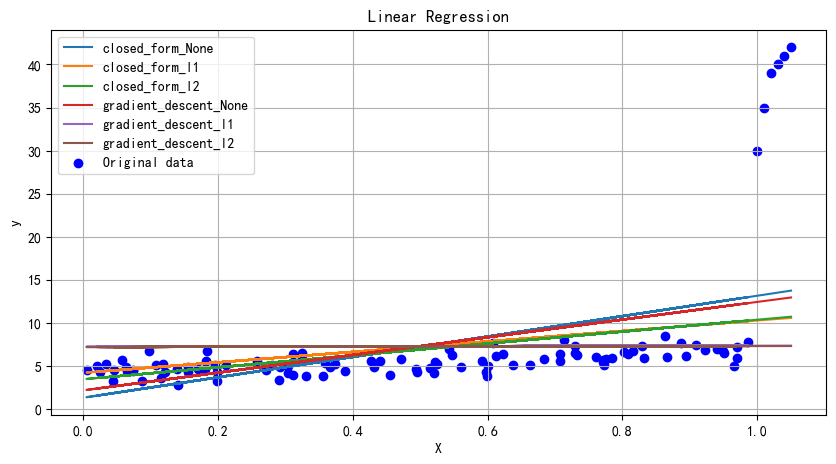

In [3]:
# Visualize data and fitted models
plt.figure(figsize=(10, 5))

# Scatter plot of original data
plt.scatter(X, y, color='blue', label='Original data')

# Fitted lines for closed-form solution and gradient descent
for m in methods:
    for r in regs:
        plt.plot(X, models['{}_{}'.format(m,r)].predict(X), label='{}_{}'.format(m,r))
# plt.plot(X, lin_reg_no_penalty_gd.predict(X), color='red', label='Gradient descent')

plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

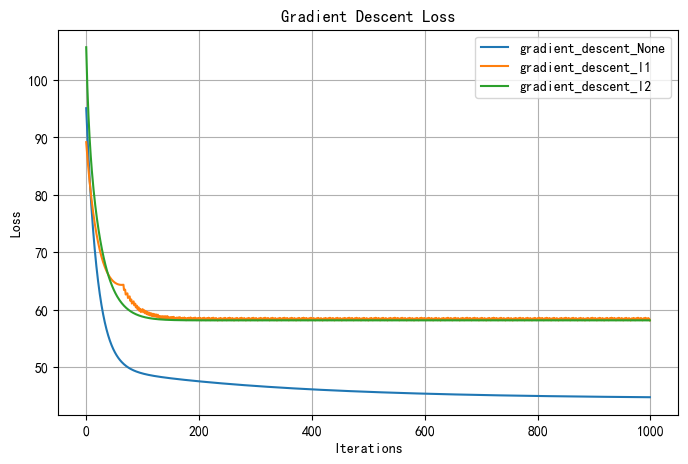

In [4]:
# Plot loss change during gradient descent
plt.figure(figsize=(8, 5))
for r in regs:
    # plt.plot(X, models['{}_{}'.format(m,r)].predict(X), label='{}_{}'.format(m,r))
    plt.plot(range(len(models['{}_{}'.format(methods[1],r)].loss_history)), 
             models['{}_{}'.format(methods[1],r)].loss_history, 
             label='{}_{}'.format(methods[1],r))
plt.title('Gradient Descent Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()